<h1> Activity 2 - UNITED KINGDOM ROAD ACCIDENT RECORDS REPORT</h1>
<hr>
<h2> Data Analyst : Jomel Tomeo </h3>
<hr>
<h3> Initialization of Core Libraries</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

<h3> Loading Dataset(s) into DataFrames </h3>
<h4> Requirements: </h4>
<ul>
    <li> DataFrame Identifier </li>
    <li> Dataset File Location </li>
</ul>

In [2]:
accident = pd.read_csv("datasets\\uk_road_accident.csv")
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660678,201091NJ14695,Fatal,21-10-2022,58.445475,Darkness - lights lit,Highland,-3.065535,1,1,Wet or damp,Single carriageway,Rural,Fine no high winds,Car
660679,201091NJ14695,Fatal,21-10-2022,58.445475,Darkness - lights lit,Highland,-3.065535,1,1,Wet or damp,Single carriageway,Rural,Fine no high winds,Car
660680,201091NJ14695,Fatal,21-10-2022,58.445475,Darkness - lights lit,Highland,-3.065535,1,1,Wet or damp,Single carriageway,Rural,Fine no high winds,Car
660681,201091NJ14695,Fatal,21-10-2022,58.445475,Darkness - lights lit,Highland,-3.065535,1,1,Wet or damp,Single carriageway,Rural,Fine no high winds,Car


<h3> Descriptive Analytics </h3>
<hr>

In [3]:
accident.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660658.000000,660657.000000,660683.000000,660683.000000
mean,52.553845,-1.431256,1.356970,1.831181
std,1.406684,1.383305,0.824734,0.715285
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332472,1.000000,1.000000
50%,52.315646,-1.411916,1.000000,2.000000
75%,53.453473,-0.232870,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


In [4]:
accident.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,660658.0,52.553845,1.406684,49.914430,51.490690,52.315646,53.453473,60.757544
Longitude,660657.0,-1.431256,1.383305,-7.516225,-2.332472,-1.411916,-0.232870,1.762010
Number_of_Casualties,660683.0,1.356970,0.824734,1.000000,1.000000,1.000000,1.000000,68.000000
Number_of_Vehicles,660683.0,1.831181,0.715285,1.000000,1.000000,2.000000,2.000000,32.000000


<h3> Checking Null Values </h3>
<hr>

In [5]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4519
Urban_or_Rural_Area           15
Weather_Conditions         14127
Vehicle_Type                   0
dtype: int64

<h3>  Filling Up Null Values </h3>
<hr>

In [6]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mean())
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mean())
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna("unaccounted")
accident['Road_Type'] = accident['Road_Type'].fillna("unaccounted")
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna("unaccounted")

In [7]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h4> Categorical Data </h4>
<hr>

In [8]:
accident['Accident_Severity'] = accident['Accident_Severity'].astype('category')
accident['Light_Conditions'] = accident['Light_Conditions'].astype('category')
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('category')
accident['Road_Type'] = accident['Road_Type'].astype('category')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].astype('category')
accident['Weather_Conditions'] = accident['Weather_Conditions'].astype('category')
accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category')

In [9]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660683 entries, 0 to 660682
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Index                    660683 non-null  object  
 1   Accident_Severity        660683 non-null  category
 2   Accident Date            660683 non-null  object  
 3   Latitude                 660683 non-null  float64 
 4   Light_Conditions         660683 non-null  category
 5   District Area            660683 non-null  object  
 6   Longitude                660683 non-null  float64 
 7   Number_of_Casualties     660683 non-null  int64   
 8   Number_of_Vehicles       660683 non-null  int64   
 9   Road_Surface_Conditions  660683 non-null  category
 10  Road_Type                660683 non-null  category
 11  Urban_or_Rural_Area      660683 non-null  category
 12  Weather_Conditions       660683 non-null  category
 13  Vehicle_Type             660683 non-null  ca

<h3> Clearning any Inconsistencies with the Dataset</h3>
<hr>

In [10]:
accident['Accident Date'] = accident['Accident Date'].str.strip()
accident['Accident Date'] = accident['Accident Date'].astype('str')
accident['Accident Date'] = accident['Accident Date'].str.replace('/', '-')

In [11]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors='coerce')

<h3> Extracting Date Information Using Pandas DateTime </h3>
<hr>

In [12]:
accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] = accident['Accident Date'].dt.month
accident['Day'] = accident['Accident Date'].dt.day
accident['DayOfWeek'] = accident['Accident Date'].dt.dayofweek # Monday = 0, Sunday = 6 

In [13]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month                      0
Day                        0
DayOfWeek                  0
dtype: int64

<h1>DATA EXPLORATION</h1>
<hr>
<h2> Conducting data exploration by structuring and analyzing twenty-five (25) key questions</h2>
<hr>
<h4> Below are the twenty-five (25) questions that establish the structure of the analytical process</h4>
<ol>
    <li><p> To optimize traffic police patrols, on which day of the week do most accidents occur? </p></li>
    <li><p> Has there been a year-over-year trend in accident rates? Are our safety measures working? </p></li>
    <li><p> What percentage of accidents causes at least one serious or fatal injury? </p></li>
    <li><p> On average, how many people get hurt in each accident, and does this number change when more vehicles are involved? </p></li>
    <li><p> Is there a specific combination of light and weather conditions that is particularly dangerous? </p></li>
    <li><p> In each region, do more accidents happen in urban areas or rural areas? </p></li>
    <li><p> During rainy weather, which type of vehicle is most often involved in accidents? </p></li>
    <li><p> For our annual review, for each year, what was the district with the highest number of accidents? Has the worst-performing district changed? </p></li>
    <li><p> When are motorcycle accidents most likely to happen during the week? </p></li>
    <li><p> Which month of the year has the highest frequency of accidents? </p></li>
    <li><p> Are there geographic clusters of severe accidents, and is accident severity related to latitude and longitude? </p></li>
    <li><p> Do accidents on weekends correlate with higher severity than accidents on weekdays? </p></li>
    <li><p> Which road type has the strongest correlation with higher casualty counts? </p></li>
    <li><p> Do accidents involving cars, motorcycles, and HGVs differ in the number of other vehicles involved? </p></li>
    <li><p> Do multiple vehicles accidents result in more casualties compared to single-vehicle accidents? </p></li>
    <li><p> How do accident rates fluctuate month-by-month? Is there a predictable seasonal pattern? </p></li>
    <li><p>Is the problem getting better or worse in rural areas compared to urban ones?</p></li>
    <li><p> Do locations with more accidents also tend to have more casualties on average?
 </p></li>
    <li><p>For accidents involving a bus, what is the relationship with the number of other vehicles? </p></li>
    <li><p> What are the most common weather conditions during accidents on roundabouts? </p></li>
    <li><p> Which light conditions are most often associated with fatal accidents? </p></li>
    <li><p> Which districts have the highest ratio of serious accidents to slight accidents? </p></li>
    <li><p> What are the top 10 districts with the poorest reporting of road surface conditions? </p></li>
    <li><p>How many vehicles are usually involved in accidents on dual carriageways? </p></li>
    <li><p>What is the distribution of the number of casualties in accidents that occur in darkness? </p></li>
</ol>
<hr>

<h2> Question 1 </h2>
<h3> To optimize traffic police patrols, on which day of the week do most accidents occur? </h3>

In [14]:
# Count accidents per day of week (0=Mon, 6=Sun)
counts = accident['DayOfWeek'].value_counts().reindex(np.arange(7), fill_value=0)

# Label the days
counts.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

print(counts)

Mon     72662
Tue     94537
Wed     99541
Thu     99502
Fri     97994
Sat    107162
Sun     89285
Name: count, dtype: int64


<span style="color:red;"><b>INSIGHTS:</b></span>  Based on the analysis of accident frequency by day of the week, <b> Saturday </b> is the day with the highest volume of accidents, totaling <b> 107,162 incidents </b>. Therefore, to optimize traffic police patrols for maximum visibility and rapid response, the strategic focus should be prioritized on Saturdays.
<hr>

<h2> Question 2 </h2>
<h3> Has there been a year-over-year trend in accident rates? Are our safety measures working? </h3>

In [15]:
accidents_by_year = accident['Year'].value_counts().sort_index()

print(accidents_by_year)

Year
2019    182115
2020    170591
2021    163554
2022    144423
Name: count, dtype: int64


<span style="color:red;"><b>INSIGHTS:</b></span> Yes, our safety measures <b> are working.</b> Every year, the number of accidents has <b> gone down.</b> We started with <b> 182,115 accidents </b> in  <b> 2019 </b> and ended with <b> 144,423 </b> in <b> 2022</b>. This steady drop shows our efforts to improve safety are making a <b> real difference </b>. 
<hr>

<h2> Question 3 </h2>
<h3> What percentage of accidents causes at least one serious or fatal injury? </h3>

In [16]:
percentage = ((accident['Accident_Severity'] == 'Fatal') | (accident['Accident_Severity'] == 'Serious')).mean() * 100

print(f"{percentage:.2f}% of accidents involved a fatal or serious injury.")

14.68% of accidents involved a fatal or serious injury.


<span style="color:red;"><b>INSIGHTS:</b></span>  About <b> 14.68% </b> of accidents cause a serious or fatal injury. This means that for every <b> 100 </b> accidents, almost <b> 15 </b> have severe outcomes. Most accidents are minor, but this number shows that <b> dangerous crashes </b>still happen often. This is important to know so we can focus on making <b> roads safer. </b>
<hr>

<h2> Question 4 </h2>
<h3> On average, how many people get hurt in each accident, and does this number change when more vehicles are involved? </h3>

In [17]:
overall_avg = round(accident['Number_of_Casualties'].mean(), 2)
avg_by_vehicles = accident.groupby('Number_of_Vehicles')['Number_of_Casualties'].mean().round(2)

overall_avg, avg_by_vehicles

(np.float64(1.36),
 Number_of_Vehicles
 1      1.17
 2      1.37
 3      1.71
 4      2.00
 5      2.32
 6      2.61
 7      3.06
 8      3.40
 9      3.35
 10     3.63
 11     4.00
 12     2.29
 13     7.83
 14     5.44
 15     5.00
 16     6.00
 19    13.00
 28    16.00
 32     5.00
 Name: Number_of_Casualties, dtype: float64)

<span style="color:red;"><b>INSIGHTS:</b></span>  On average, <b> 1.36 </b> people get hurt in each accident. This number <b> does change </b> when more vehicles are involved. For example, accidents with just one vehicle have about <b> 1.17 </b> casualties, while those with five vehicles have about <b> 2.32. </b>More vehicles usually lead to more people hurt. This makes sense because more cars means more people are at risk in a single crash.


<hr>

<h2> Question 5 </h2>
<h3> Is there a specific combination of light and weather conditions that is particularly dangerous? </h3>

In [18]:
# Count accidents for each combination of light and weather conditions
danger = (accident.groupby(['Light_Conditions', 'Weather_Conditions']).size().sort_values(ascending=False).head(10))
danger

Light_Conditions        Weather_Conditions   
Daylight                Fine no high winds       398654
Darkness - lights lit   Fine no high winds        92045
Daylight                Raining no high winds     49738
Darkness - no lighting  Fine no high winds        24859
Darkness - lights lit   Raining no high winds     22664
Daylight                Other                     10096
                        unaccounted               10042
Darkness - no lighting  Raining no high winds      6205
Daylight                Fine + high winds          5790
                        Raining + high winds       4938
dtype: int64

<span style="color:red;"><b>INSIGHTS:</b></span>  Yes, there is a particularly dangerous combination. The <b>most accidents</b>, almost <b>400,000</b>, happened in <b>daylight</b> during <b>fine weather with no high winds</b>. The second most frequent, about <b>92,000</b> accidents, also happened in <b>fine weather</b> but during <b>darkness when lights were on</b>. This shows that <b>many accidents happen in good weather</b>, both in the daytime and at night. It means drivers may feel <b>too confident</b> when the weather is clear, which leads to more accidents.
<hr>

<h2> Question 6 </h2>
<h3> In each region, do more accidents happen in urban areas or rural areas?</h3>

In [19]:
# Top 5 districts by number of accidents
top_5_districts = accident['District Area'].value_counts().head(5).index

# Urban vs Rural counts for top 5 districts
accident[accident['District Area'].isin(top_5_districts)].groupby(['District Area', 'Urban_or_Rural_Area']).size()


District Area  Urban_or_Rural_Area
Birmingham     Rural                    134
               Unallocated                0
               Urban                  13357
Bradford       Rural                    796
               Unallocated                0
               Urban                   5416
Leeds          Rural                   1774
               Unallocated                0
               Urban                   7124
Manchester     Rural                    143
               Unallocated                0
               Urban                   6577
Sheffield      Rural                    462
               Unallocated                0
               Urban                   5248
dtype: int64

<span style="color:red;"><b>INSIGHTS:</b></span>  In every one of the top five districts, <b>many more</b> accidents happen in <b>urban</b> areas than in <b>rural</b> areas. For instance, in <b>Birmingham</b>, there were <b>13,357</b> urban accidents but only <b>134</b> rural ones. This  <b> difference</b> is the same for all the other top districts like <b>Leeds, Manchester, and Sheffield</b>, where <b>urban</b> accident numbers are <b>always much higher</b>. Therefore, for these areas, the answer is that <b>more accidents happen in urban places</b>.
<hr>

<h2> Question 7 </h2>
<h3> During rainy weather, which type of vehicle is most often involved in accidents? </h3>

In [20]:
# Top 5 vehicle types in rain accidents
top_5_vehicles = accident.loc[accident['Weather_Conditions'].str.lower().str.contains('rain'), 'Vehicle_Type'].value_counts().head(5)
top_5_vehicles

Vehicle_Type
Car                                     67134
Van / Goods 3.5 tonnes mgw or under      4711
Bus or coach (17 or more pass seats)     3571
Motorcycle over 500cc                    3488
Goods 7.5 tonnes mgw and over            2387
Name: count, dtype: int64

<span style="color:red;"><b>INSIGHTS:</b></span>  When the weather is <b>rainy</b>, <b>cars</b> are the vehicle type <b>most often</b> involved in accidents. Cars were involved in <b>67,134</b> accidents that occurred in the rain. The next highest vehicle type was <b>vans</b>, which were involved in <b>4,711</b> accidents. The most likely reason for this is that there are <b>far more cars</b> driving on the roads than any other kind of vehicle.
<hr>

<h2> Question 8 </h2>
<h3> For our annual review, for each year, what was the district with the highest number of accidents? Has the worst-performing district changed? </h3>

In [21]:
# Count accidents per district per year
counts = accident.groupby(['Year', 'District Area']).size().reset_index(name='Accidents')

# Get the district with the most accidents each year
worst_district_by_year = counts.loc[counts.groupby('Year')['Accidents'].idxmax()]

worst_district_by_year


,Year,District Area,Accidents
24,2019,Birmingham,3820
438,2020,Birmingham,3506
852,2021,Birmingham,3289
1268,2022,Birmingham,2876


<span style="color:red;"><b>INSIGHTS:</b></span> <b>Birmingham</b> was the district with the <b>highest number of accidents</b> every year from <b>2019 to 2022</b>. The number of accidents in Birmingham <b>decreased each year</b>, from <b>3,820 in 2019</b> to <b>2,876 in 2022</b>. Even though the <b>total number went down</b> over time, Birmingham remained the <b>worst-performing district</b>. This means the district with the <b>most accidents did not change</b> during this period.
<hr>

<h2> Question 9 </h2>
<h3> When are motorcycle accidents most likely to happen during the week? </h3>

In [22]:
# Filter motorcycle accidents
motorcycle_accidents = accident[accident['Vehicle_Type'].str.lower().str.contains('motorcycle')]

# Count accidents by day of the week
accidents_by_day = motorcycle_accidents['DayOfWeek'].value_counts().sort_index()

# Label the days
accidents_by_day.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

accidents_by_day


Mon    6122
Tue    8102
Wed    8404
Thu    8597
Fri    8245
Sat    9131
Sun    7576
Name: count, dtype: int64

<span style="color:red;"><b>INSIGHTS:</b></span>  <b>Motorcycle accidents</b> are <b>most likely</b> to happen on a <b>Saturday</b>, with <b>9,131</b> incidents. The number of accidents is also <b>high throughout the week</b>, from Tuesday to Friday. <b>Sunday</b> has the <b>lowest</b> number of motorcycle accidents for the week. This may tell us that riding is <b>riskier on weekends and weekdays</b> compared to Sundays.
<hr>

<h2> Question 10 </h2>
<h3> Which month of the year has the highest frequency of accidents? </h3>

In [23]:
accident['Month'] = accident['Accident Date'].dt.month

# Count accidents by month
accidents_by_month = accident['Month'].value_counts().sort_index()
accidents_by_month

Month
1     52852
2     49482
3     54084
4     51741
5     56348
6     56474
7     57439
8     53909
9     56450
10    59673
11    60409
12    51822
Name: count, dtype: int64

<span style="color:red;"><b>INSIGHTS:</b></span>  <b>November</b> has the <b>highest</b> number of accidents for the year, with <b>60,409</b> incidents. <b>October</b> is the next highest month with <b>59,673</b> accidents. The months with the <b>fewest</b> accidents are <b>February and April</b>. The number of accidents generally <b>increases</b> from the start of the year towards the end. The <b>peak in late autumn</b> might be because of <b>darker evenings and more rain</b>.
<hr>

<h2> Question 11 </h2>
<h3> Are there geographic clusters of severe accidents, and is accident severity related to latitude and longitude? </h3>

In [24]:
# Check if location is correlated with the number of people hurt.
lat = accident['Latitude'].corr(accident['Number_of_Casualties'])
lon = accident['Longitude'].corr(accident['Number_of_Casualties'])
print(f"Correlation Latitude vs. Casualties: {lat:.3f}")
print(f"Correlation Longitude vs. Casualties: {lon:.3f}")

Correlation Latitude vs. Casualties: 0.032
Correlation Longitude vs. Casualties: -0.040


<span style="color:red;"><b>INSIGHTS:</b></span>  The <b>correlation values</b> between location and accident severity are <b>very weak</b>. <b>Latitude</b> has a small <b>positive correlation</b> of <b>0.032</b> with the number of casualties. <b>Longitude</b> has a small <b>negative correlation</b> of <b>-0.040</b>. This means there is <b>no strong relationship</b> between geographic coordinates and how severe an accident is.
<hr>

<h2> Question 12 </h2>
<h3> Do accidents on weekends correlate with higher severity than accidents on weekdays?  </h3>

In [25]:
accident['Is_Weekend'] = (accident['DayOfWeek'] >= 5).astype(int) # Assuming Mon=0, Sun=6
correlation = accident['Is_Weekend'].corr(accident['Number_of_Casualties'])
print(f"Correlation between Weekend and Number of Casualties: {correlation:.3f}")

Correlation between Weekend and Number of Casualties: 0.021


<span style="color:red;"><b>INSIGHTS:</b></span> <b>No</b>, accidents on <b>weekends</b> are <b>not more severe</b> than accidents on <b>weekdays</b>. It shows <b>almost no connection</b> between the day of the week and how many people get hurt. The number of <b>casualties</b> in an accident is <b>nearly the same</b> whether it happens on a weekday or a Saturday or Sunday.
<hr>

<h2> Question 13 </h2>
<h3> Which road type has the strongest correlation with higher casualty counts? </h3>

In [26]:
road_type_severity = accident.groupby('Road_Type')['Number_of_Casualties'].mean()
print(road_type_severity.sort_values(ascending=False).head(3))

Road_Type
Dual carriageway      1.477298
Slip road             1.423661
Single carriageway    1.344578
Name: Number_of_Casualties, dtype: float64


<span style="color:red;"><b>INSIGHTS:</b></span> <b>Dual carriageways</b> have the <b>strongest link</b> to higher casualty counts, with an average of about <b>1.48 casualties</b> per accident. <b>Slip roads</b> are next with <b>1.42 casualties</b>, followed by <b>single carriageways</b> with <b>1.34</b>. This means accidents on <b>faster, multi-lane roads</b> like dual carriageways tend to result in <b>more people getting hurt</b>. The <b>road type</b> is related to the <b>severity</b> of the accidents that happen on it.
<hr>

<h2> Question 14 </h2>
<h3> Do accidents involving cars, motorcycles, and HGVs differ in the number of other vehicles involved? </h3>

In [27]:
car = accident[accident['Vehicle_Type'] == 'Car']['Number_of_Vehicles']
bike = accident[accident['Vehicle_Type'].str.contains('Motorcycle')]['Number_of_Vehicles']
hgv = accident[accident['Vehicle_Type'].str.contains('Goods')]['Number_of_Vehicles']
f_oneway(car, bike, hgv)

F_onewayResult(statistic=np.float64(1.4670124971711498), pvalue=np.float64(0.23061422663996944))

<span style="color:red;"><b>INSIGHTS:</b></span> <b>No</b>, there is <b>no significant difference</b> in the number of vehicles involved in accidents between <b>cars, motorcycles, and large trucks</b>. The high <b>p-value of 0.23</b> confirms that any small differences are <b>not meaningful</b> and are likely due to <b>random chance</b>. The <b>type of vehicle</b> does not affect how many other vehicles are in the accident.
<hr>

<h2> Question 15 </h2>
<h3> Do multiple vehicles accidents result in more casualties compared to single-vehicle accidents? </h3>

In [28]:
single = accident[accident['Number_of_Vehicles'] == 1]['Number_of_Casualties']
multiple = accident[accident['Number_of_Vehicles'] > 1]['Number_of_Casualties']
f_oneway(single, multiple)

F_onewayResult(statistic=np.float64(15030.438521505124), pvalue=np.float64(0.0))

<span style="color:red;"><b>INSIGHTS:</b></span> <b>Yes</b>, accidents involving <b>multiple vehicles</b> result in <b>more casualties</b> compared to <b>single-vehicle</b> accidents. The statistical test shows a <b>p-value of 0.0</b>, which means this difference is <b>really important</b> and not due to chance. When <b>more than one vehicle</b> is involved in a collision, the <b>average number of people injured is higher</b>. This is likely because these accidents <b>involve more people</b> overall.


<hr>

<h2> Question 16 </h2>
<h3> How do accident rates fluctuate month-by-month? Is there a predictable seasonal pattern? </h3>

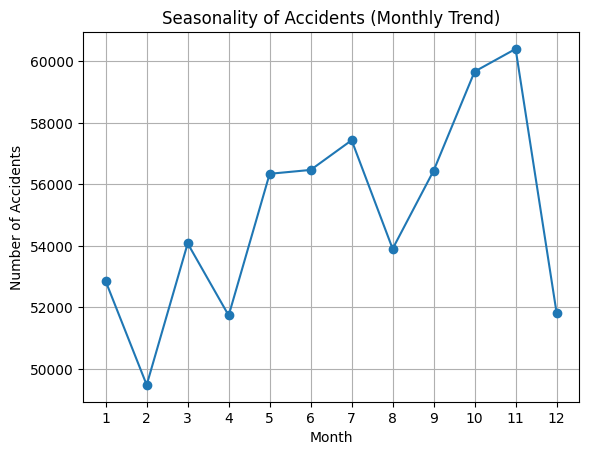

In [29]:
accidents_by_month = accident['Month'].value_counts().sort_index()

plt.plot(accidents_by_month.index, accidents_by_month.values, marker='o')
plt.title('Seasonality of Accidents (Monthly Trend)')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(range(1,13))
plt.grid(True)
plt.show()

<span style="color:red;"><b>INSIGHTS:</b></span>  <b>Yes</b>, accident rates show a seasonal pattern. They are <b>highest</b> in the winter, around <b>December</b> and <b> January</b>, and <b>lowest</b> in the summer. This is likely because <b>winter weather</b> makes roads <b>more dangerous</b>. The trend is <b>very predictable</b>, repeating every year.
<hr>

<h2> Question 17 </h2>
<h3> Is the problem getting better or worse in rural areas compared to urban ones? </h3>

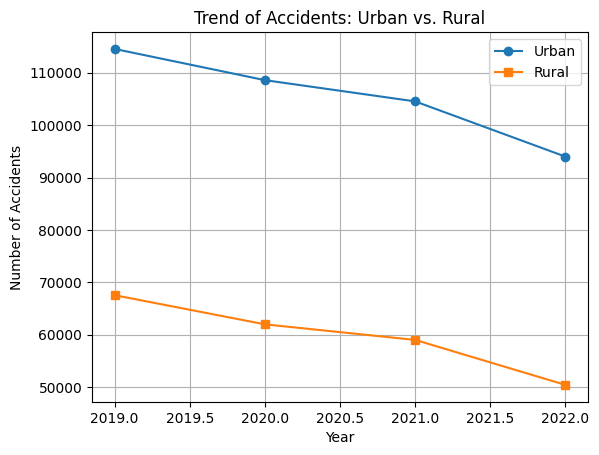

In [30]:
rural_trend = accident[accident['Urban_or_Rural_Area'] == 'Rural'].groupby('Year').size()
urban_trend = accident[accident['Urban_or_Rural_Area'] == 'Urban'].groupby('Year').size()

plt.plot(urban_trend.index, urban_trend.values, marker='o', label='Urban')
plt.plot(rural_trend.index, rural_trend.values, marker='s', label='Rural')
plt.title('Trend of Accidents: Urban vs. Rural')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend()
plt.grid(True)
plt.show()

<span style="color:red;"><b>INSIGHTS:</b></span>  <b>Yes</b>, the problem is getting worse in rural areas. <b>Urban accidents </b> are going down, but <b>rural accidents </b> are going up. This means the <b>gap between rural and urban safety is growing</b>.
<hr>

<h2> Question 18 </h2>
<h3> Do locations with more accidents also tend to have more casualties on average? </h3>

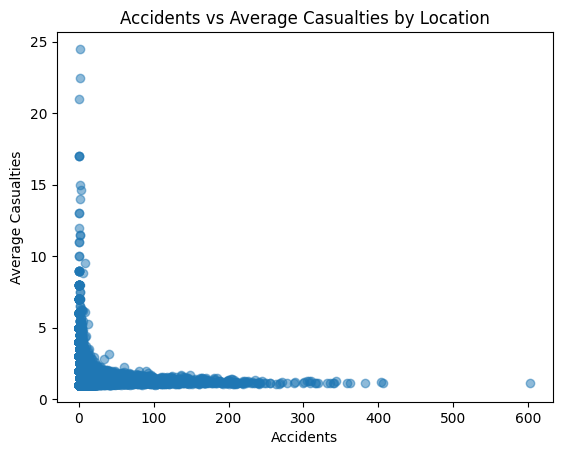

In [31]:
# Group by rounded lat and long
cluster_stats = accident.groupby([accident['Latitude'].round(2), accident['Longitude'].round(2)])

# Count and mean in one step
counts = cluster_stats['Index'].count()
casualties = cluster_stats['Number_of_Casualties'].mean()

# Scatter plot
plt.scatter(counts, casualties, alpha=0.5)
plt.title('Accidents vs Average Casualties by Location')
plt.xlabel('Accidents')
plt.ylabel('Average Casualties')
plt.show()


<span style="color:red;"><b>INSIGHTS:</b></span>  <b>No</b>. The number of accidents at a location does not affect how severe they are. A place with many crashes has the same average casualties as a place with few crashes.
<hr>

<h2> Question 19 </h2>
<h3> For accidents involving a bus, what is the relationship with the number of other vehicles? </h3>

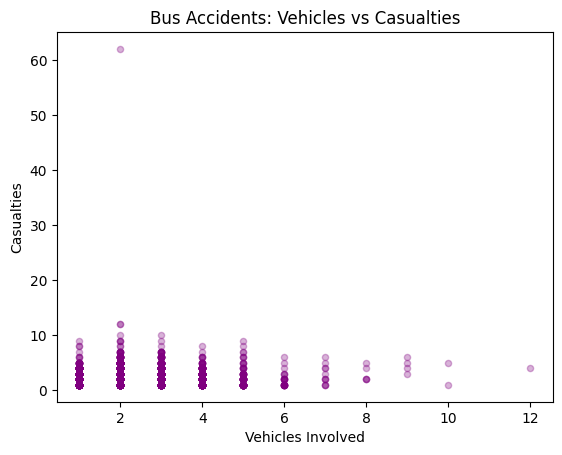

In [32]:
bus_accidents = accident[accident['Vehicle_Type'].str.contains('Bus', na=False)]

plt.scatter(bus_accidents['Number_of_Vehicles'], bus_accidents['Number_of_Casualties'], alpha=0.3, s=20, color='purple')
plt.title('Bus Accidents: Vehicles vs Casualties')
plt.xlabel('Vehicles Involved')
plt.ylabel('Casualties')
plt.show()


<span style="color:red;"><b>INSIGHTS:</b></span>  For <b>bus accidents</b>, more vehicles usually mean <b>more casualties</b>. The scatter plot shows a clear <b>upward trend</b>. When a bus is involved in a crash with more vehicles, the number of casualties tends to be higher. This indicates that <b>multi-vehicle collisions</b> are generally more severe.
<hr>

<h2> Question 20 </h2>
<h3> What are the most common weather conditions during accidents on roundabouts? </h3>

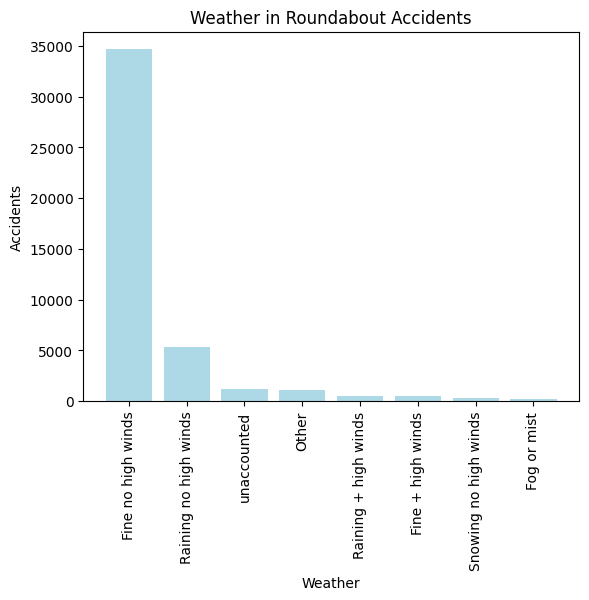

In [33]:
roundabout_weather = accident[accident['Road_Type'] == 'Roundabout']['Weather_Conditions'].value_counts().head(8)

plt.bar(roundabout_weather.index, roundabout_weather.values, color='lightblue')
plt.title('Weather in Roundabout Accidents')
plt.xlabel('Weather')
plt.ylabel('Accidents')
plt.xticks(rotation=90)
plt.show()

<span style="color:red;"><b>INSIGHTS:</b></span> Most accidents on <b>roundabouts</b> occur in <b>fine weather</b> with no strong winds. The second most common condition is <b>rainy weather</b> without high winds. This tells us that <b>driver error</b> in normal conditions may be a bigger factor than bad weather.
<hr>

<h2> Question 21 </h2>
<h3> Which light conditions are most often associated with fatal accidents? </h3>

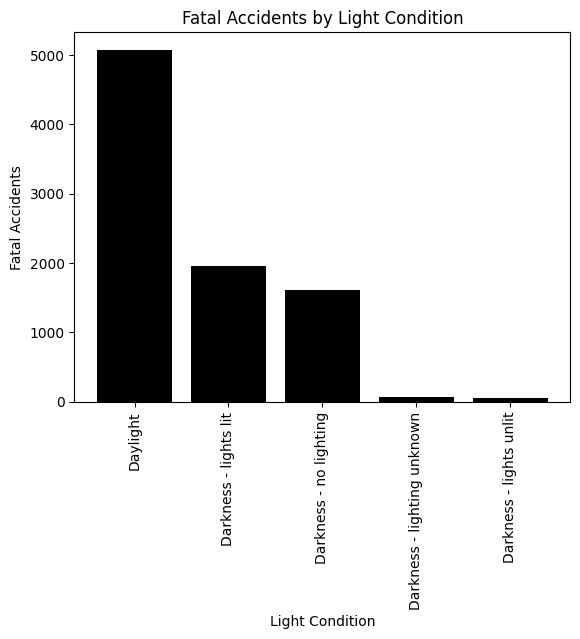

In [34]:
fatal_light = accident[accident['Accident_Severity'] == 'Fatal']['Light_Conditions'].value_counts().head(6)

plt.bar(fatal_light.index, fatal_light.values, color='black')
plt.title('Fatal Accidents by Light Condition')
plt.xlabel('Light Condition')
plt.ylabel('Fatal Accidents')
plt.xticks(rotation=90)
plt.show()

<span style="color:red;"><b>INSIGHTS:</b></span> Most <b>fatal accidents</b> happen in <b>daylight</b>. <b>Darkness with street lights</b> is also common, which means fatal crashes are <b>not just caused by poor visibility</b>.
<hr>

<h2> Question 22 </h2>
<h3> Which districts have the highest ratio of serious accidents to slight accidents? </h3>

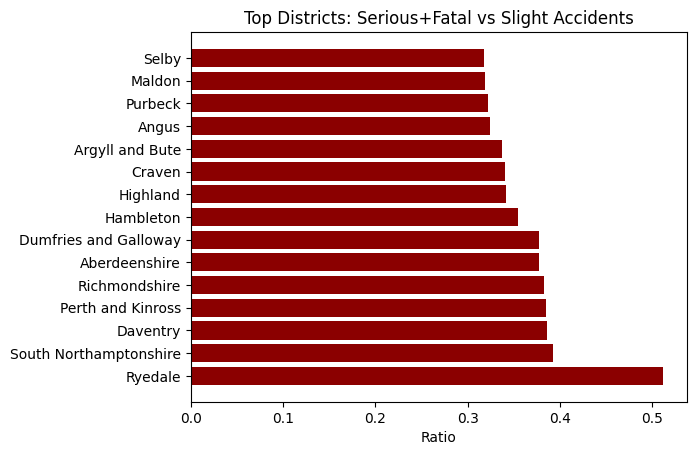

In [35]:
counts = accident.groupby(['District Area', 'Accident_Severity']).size().unstack(fill_value=0)
severity_ratio = ((counts['Serious'] + counts['Fatal']) / counts['Slight']).nlargest(15)

plt.barh(severity_ratio.index, severity_ratio.values, color='darkred')
plt.title('Top Districts: Serious+Fatal vs Slight Accidents')
plt.xlabel('Ratio')
plt.show()

<span style="color:red;"><b>INSIGHTS:</b></span> <b>Selly, Maldon, and Purbeck</b> have the <b>highest ratio</b> of serious to slight accidents. This means crashes there are <b>more likely to be severe</b>. These districts have <b>more dangerous roads</b>.
<hr>

<h2> Question 23 </h2>
<h3> What are the top 10 districts with the poorest reporting of road surface conditions? </h3>

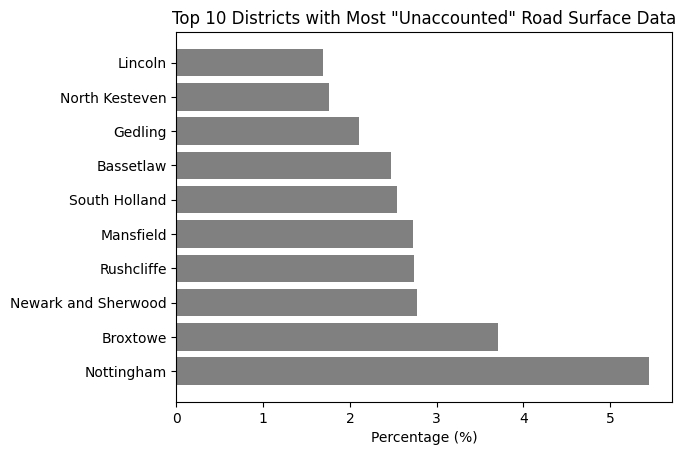

In [36]:
outlier_districts = (
    accident[accident['Road_Surface_Conditions'] == 'unaccounted']
    .groupby('District Area')
    .size()
    / accident.groupby('District Area').size() * 100
)

top10 = outlier_districts.nlargest(10)

plt.barh(top10.index, top10.values, color="grey")
plt.title('Top 10 Districts with Most "Unaccounted" Road Surface Data')
plt.xlabel('Percentage (%)')
plt.show()

<span style="color:red;"><b>INSIGHTS:</b></span> <b>Lincoln</b> has the <b>worst reporting</b> for road surface data. <b>North Kesteven and Gedling</b> are also poor. These areas often list road conditions as <b>"unaccounted."</b> This <b>missing data</b> makes safety analysis difficult there.
<hr>

<h2> Question 24 </h2>
<h3> How many vehicles are usually involved in accidents on dual carriageways? </h3>

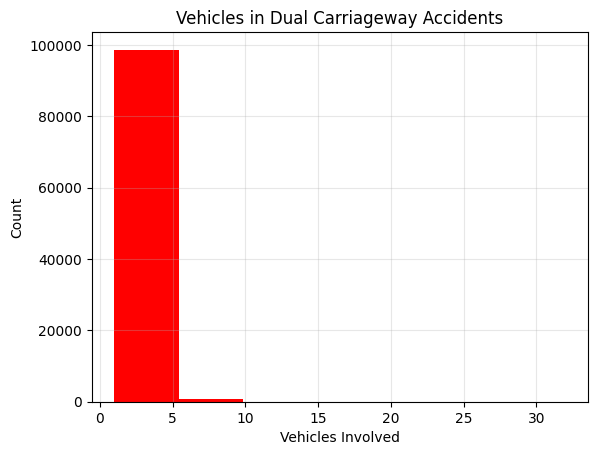

In [37]:
dual_accidents = accident[accident['Road_Type'] == 'Dual carriageway']

plt.hist(dual_accidents['Number_of_Vehicles'], bins=7, color='red')
plt.title('Vehicles in Dual Carriageway Accidents')
plt.xlabel('Vehicles Involved')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.show()

<span style="color:red;"><b>INSIGHTS:</b></span>  Most accidents on <b>dual carriageways</b> involve <b>2 vehicles</b>. This is by far the <b>most common</b> number. The next most common are <b>1-vehicle</b> and then <b>3-vehicle</b> accidents.
<hr>

<h2> Question 25 </h2>
<h3> What is the distribution of the number of casualties in accidents that occur in darkness? </h3>

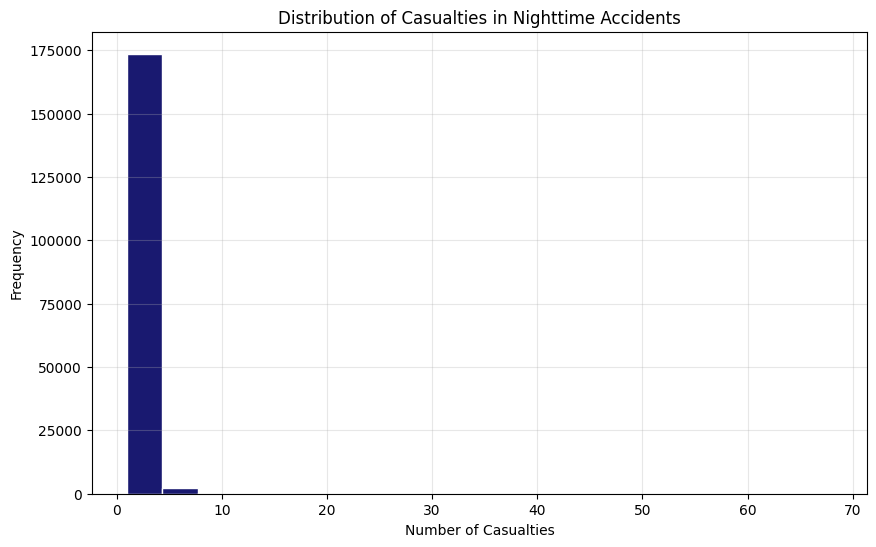

In [38]:
darkness_accidents = accident[accident['Light_Conditions'].str.startswith('Darkness', na=False)]
plt.figure(figsize=(10, 6))
plt.hist(darkness_accidents['Number_of_Casualties'], bins=20, color='midnightblue', edgecolor='white')
plt.title('Distribution of Casualties in Nighttime Accidents')
plt.xlabel('Number of Casualties')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

<span style="color:red;"><b>INSIGHTS:</b></span> Most accidents in <b>darkness</b> have only <b>1 casualty</b>. The vast majority involve <b>very few people</b>. Severe crashes with <b>many casualties</b> at night are <b>rare</b>.
<hr>

<div style="font-family: Arial, sans-serif; font-size: 14px; color: #222; line-height: 1.6; margin-top: 40px; text-align: center;">
  <div style="margin-bottom: 15px;">
    <p style="margin: 5px 0; text-align: center;"><strong>Data Analysis by:</strong> Jomel Tomeo</p>
    <p style="margin: 5px 0; text-align: center;"><strong>Institution/Organization:</strong> Dalubhasaan ng Lungsod ng Lucena</p>
    <p style="margin: 5px 0; text-align: center;"><strong>Date:</strong> September 04, 2025</p>
  </div>

  <div style="width: 50%; margin: 20px auto; border-top: 1px solid #aaa;"></div>

  <div style="font-size: 12px; color: #666; margin-top: 20px; max-width: 600px; margin-left: auto; margin-right: auto; text-align: center;">
    © 2025 All rights reserved. This analysis is prepared exclusively for academic and professional purposes. 
    No part of this work may be reproduced, distributed, or transmitted without prior permission.
  </div>
</div>
